## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/Classroom/CSE\ 519\ Fall\ 2021/HW3

/content/drive/MyDrive/Classroom/CSE 519 Fall 2021/HW3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

In [ ]:
%cp kaggle.json /root/.kaggle/

In [ ]:
!kaggle competitions download -c  rossmann-store-sales

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 12.6MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 19.6MB/s]
 45% 3.00M/6.71M [00:00<00:00, 28.9MB/s]
100% 6.71M/6.71M [00:00<00:00, 42.8MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 5.70MB/s]


In [ ]:
%ls

cse519_hw3_bond_james_123456789.ipynb  sample_submission.csv  test.csv.zip
kaggle.json                            store.csv              train.csv.zip


## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import math

In [186]:
#fill in dtypes dict for efficient memory utilization
dtypes = {
    'Store':'int32',
    'DayOfWeek':'int16',
    'Date':'category',
    'Sales':'float64',
    'Customers':'float64',
    'Open':'int16',
    'Promo':'int16',
    'StateHoliday':'category',
    'SchoolHoliday':'int16',
    'StoreType':'category',
    'Assortment':'category',
    'CompetitionDistance':'float32',
    'CompetitionOpenSinceMonth':'float32',
    'CompetitionOpenSinceYear':'float32',
    'Promo2':'int32',
    'Promo2SinceWeek':'float32',
    'Promo2SinceYear':'float32',
    'PromoInterval':'category',
 }
train_df = pd.read_csv("train.csv", dtype = dtypes)
store_df = pd.read_csv("store.csv", dtype = dtypes)
merged_df=train_df.merge(store_df,how='left',on='Store')
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## **Section 2: Effect of Holidays (Q2)**

**Do people shop more during the holidays or before the holidays?  Analyze how different types of holidays affect the sales.**

From below plots we can observe that there is evident trend of low sales on holidays and increase in sales in 1-2 weeks before holiday. 

In [ ]:
holiday_df = merged_df[["Store", "Date", "Open", "Sales", "StateHoliday"]]
print(holiday_df["StateHoliday"].unique())

salesOnHoliday = holiday_df.groupby(by="StateHoliday").sum().reset_index()
salesOnHoliday

['0', 'a', 'b', 'c']
Categories (4, object): ['0', 'a', 'b', 'c']


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,StateHoliday,Store,Open,Sales
0,0,550669959.0,843482.0,5.865165e+09
1,a,11344209.0,694.0,5.890305e+06
2,b,3733020.0,145.0,1.433744e+06
3,c,2292556.0,71.0,6.918060e+05


#Public Holidays

We can see in below plots, highlighted red bars are the low sales dips due to public holiday. 

In [ ]:
#Holiday dates
dates = train_df[(train_df["StateHoliday"] == "a")&(train_df["Sales"]>0)]["Date"].unique() #&(train_df["DayOfWeek"]!=7)
df = train_df.copy()
df.Date = pd.to_datetime(df.Date)
df.index = df.Date.dt.date
#df = df[(df['Sales']>0)&(df["StateHoliday"] == "a")][["Sales"]]
df = df[(df['Sales']>0)&(df["DayOfWeek"]!=7)][["Sales"]]
df = df.groupby(df.index).sum()

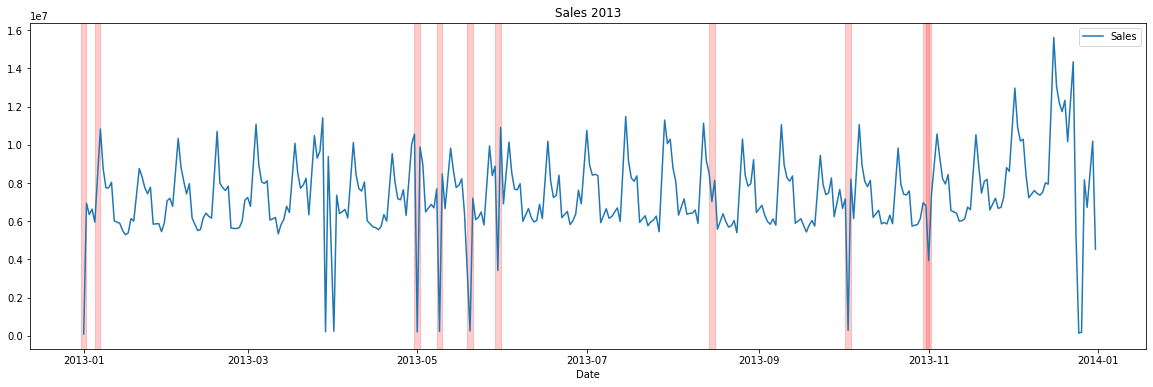

In [ ]:
df.loc[datetime.date(2013,1,1):datetime.date(2013,12,31)].plot(y='Sales',use_index = True, title='Sales 2013',figsize=(20,6))
for dt in dates:
  xmin = datetime.datetime.strptime(dt, "%Y-%m-%d")-datetime.timedelta(1)
  xmax = datetime.datetime.strptime(dt, "%Y-%m-%d")+datetime.timedelta(1)
  if xmax.date()<=datetime.date(2013,12,31):
    plt.axvspan(xmin, xmax, color='red', alpha=0.2)

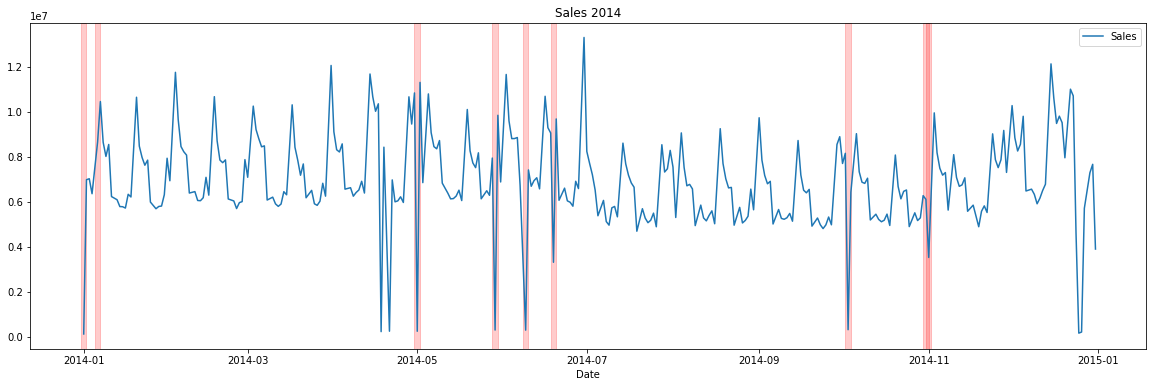

In [ ]:
df.loc[datetime.date(2014,1,1):datetime.date(2014,12,31)].plot(y='Sales',use_index = True, title='Sales 2014',figsize=(20,6))
for dt in dates:
  xmin = datetime.datetime.strptime(dt, "%Y-%m-%d")-datetime.timedelta(1)
  xmax = datetime.datetime.strptime(dt, "%Y-%m-%d")+datetime.timedelta(1)
  if xmin.date()>= datetime.date(2013,12,31) and xmax.date()<=datetime.date(2015,1,1):
    plt.axvspan(xmin, xmax, color='red', alpha=0.2)

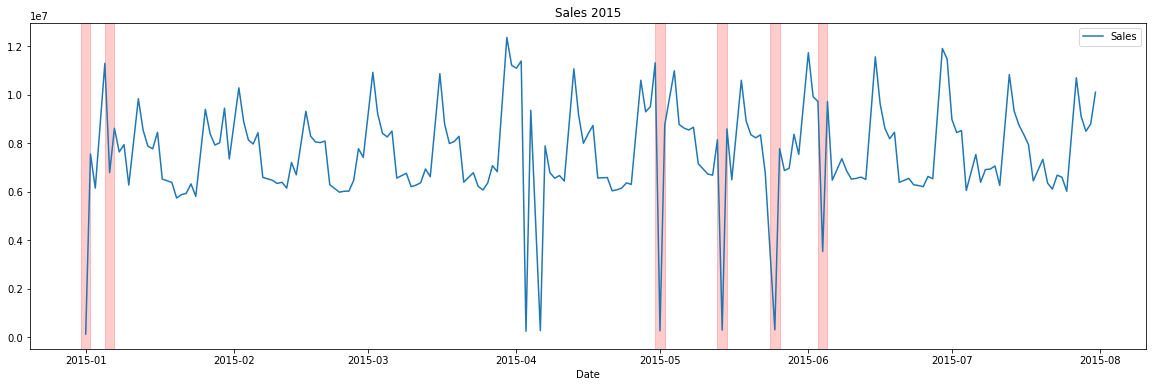

In [ ]:
df.loc[datetime.date(2015,1,1):datetime.date(2015,12,31)].plot(y='Sales',use_index = True, title='Sales 2015',figsize=(20,6))
for dt in dates:
  xmin = datetime.datetime.strptime(dt, "%Y-%m-%d")-datetime.timedelta(1)
  xmax = datetime.datetime.strptime(dt, "%Y-%m-%d")+datetime.timedelta(1)
  if xmin.date()>= datetime.date(2014,12,31):
    plt.axvspan(xmin, xmax, color='red', alpha=0.2)

# Easter Sales

We see increased sales week before Easter and sales dips during Easter. Identical Behaviour is observed througout three years.

In [ ]:
train_df[train_df["StateHoliday"] == "b"]["Date"].unique()

['2015-04-06', '2015-04-03', '2014-04-21', '2014-04-18', '2013-04-01', '2013-03-29']
Categories (6, object): ['2015-04-06', '2015-04-03', '2014-04-21', '2014-04-18', '2013-04-01',
                         '2013-03-29']

In [ ]:
df = train_df.copy()
df.Date = pd.to_datetime(df.Date)
df.index = df.Date.dt.date
#df = df[(df['Sales']>0)&(df["DayOfWeek"]!=7)][["Sales"]]
df = df[(df['Sales']>0)][["Sales"]]
df = df.groupby(df.index).sum()

**2013**

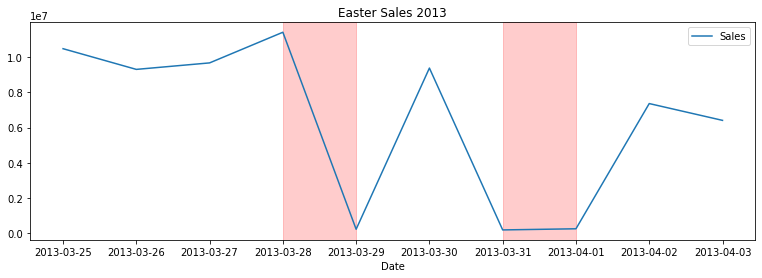

In [ ]:
df.loc[datetime.date(2013,3,25):datetime.date(2013,4,3)].plot(y='Sales',use_index = True, title='Easter Sales 2013',figsize=(13,4))
plt.axvspan(datetime.date(2013,3,28),datetime.date(2013,3,29), color='red', alpha=0.2)
plt.axvspan(datetime.date(2013,3,31),datetime.date(2013,4,1), color='red', alpha=0.2)



**2014**

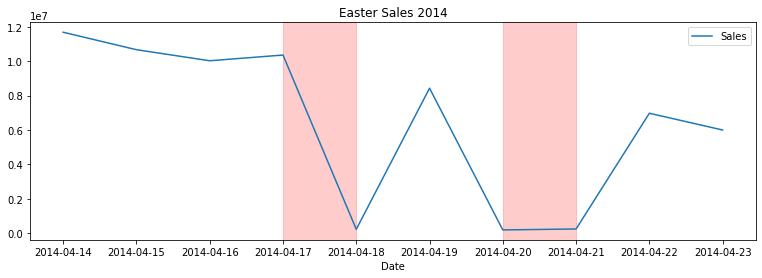

In [ ]:
df.loc[datetime.date(2014,4,14):datetime.date(2014,4,23)].plot(y='Sales',use_index = True, title='Easter Sales 2014',figsize=(13,4))
plt.axvspan(datetime.date(2014,4,17), datetime.date(2014,4,18), color='red', alpha=0.2)
plt.axvspan(datetime.date(2014,4,20), datetime.date(2014,4,21), color='red', alpha=0.2)

**2015**

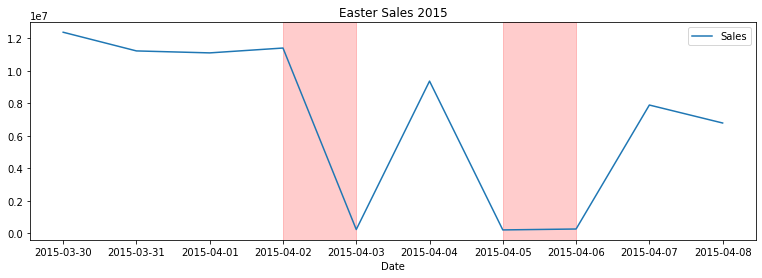

In [ ]:
df.loc[datetime.date(2015,3,30):datetime.date(2015,4,8)].plot(y='Sales',use_index = True, title='Easter Sales 2015',figsize=(13,4))
plt.axvspan(datetime.date(2015,4,2), datetime.date(2015,4,3), color='red', alpha=0.2)
plt.axvspan(datetime.date(2015,4,5), datetime.date(2015,4,6), color='red', alpha=0.2)

# Christmas Sales

We see increased sales week before christmas and lowest relative sales on 25th and 31st/1st. Identical Behaviour is observed througout three years.

In [ ]:
train_df[train_df["StateHoliday"] == "c"]["Date"].unique()

['2014-12-26', '2014-12-25', '2013-12-26', '2013-12-25']
Categories (4, object): ['2014-12-26', '2014-12-25', '2013-12-26', '2013-12-25']

In [ ]:
df = train_df.copy()
df.Date = pd.to_datetime(df.Date)
df.index = df.Date.dt.date
df = df[(df['Sales']>0) & (df["DayOfWeek"]!=7)][["Sales"]]
df = df.groupby(df.index).sum()

**2013**

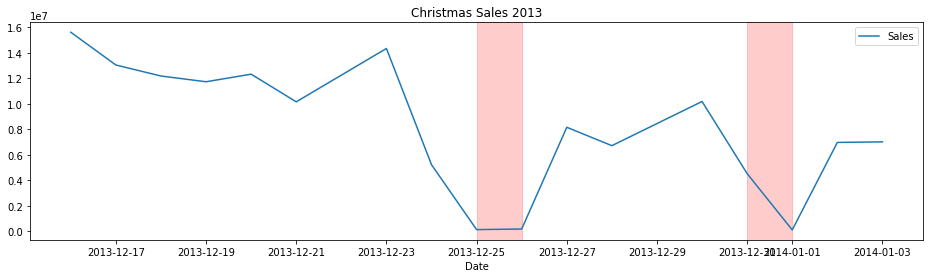

In [ ]:
#df.loc[datetime.date(2013,12,15):datetime.date(2014,1,3)].plot(y='Sales',use_index = True, title='Christmas Sales 2013',figsize=(16,4))
df.loc[datetime.date(2013,12,15):datetime.date(2014,1,3)].plot(y='Sales',use_index = True, title='Christmas Sales 2013',figsize=(16,4))
plt.axvspan(datetime.date(2013,12,25), datetime.date(2013,12,26), color='red', alpha=0.2)
plt.axvspan(datetime.date(2013,12,31), datetime.date(2014,1,1), color='red', alpha=0.2)

**2014**

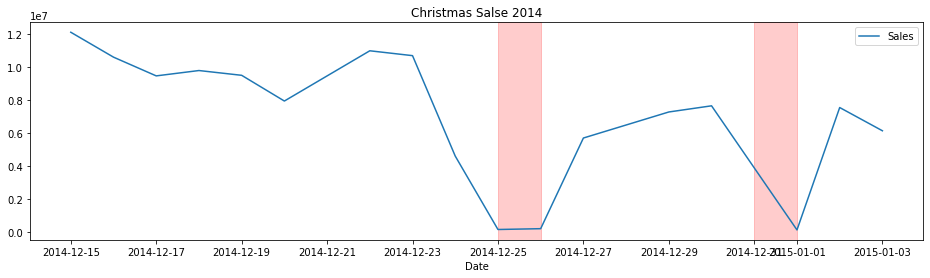

In [ ]:
df.loc[datetime.date(2014,12,14):datetime.date(2015,1,3)].plot(y='Sales',use_index = True, title='Christmas Salse 2014',figsize=(16,4))
plt.axvspan(datetime.date(2014,12,25), datetime.date(2014,12,26), color='red', alpha=0.2)
plt.axvspan(datetime.date(2014,12,31), datetime.date(2015,1,1), color='red', alpha=0.2)

## **Section 3: Most and Least selling stores (Q3a & Q3b)**

In [ ]:
df = merged_df.groupby("Store").size().reset_index()
df.rename(columns={0:'Total Days'}, inplace = True)
storesToExclude = []
for i in range(len(df[df['Total Days']>=180])):
  dts = pd.to_datetime(train_df[train_df['Store']==i+1]['Date'])
  start_date, end_date = dts.min(), dts.max()
  if end_date - start_date < datetime.timedelta(180):
      storesToExclude.append(i+1)
print(storesToExclude)

[]


In [ ]:
df = merged_df.groupby("Store").sum()["Sales"].reset_index().sort_values(by="Sales", ascending=False)
print("Stores with highest cumulative sales:{}".format(df.head()["Store"].values))
print("Stores with least cumulative sales:{}".format(df.tail()["Store"].values))

Stores with highest cumulative sales:[ 262  817  562 1114  251]
Stores with least cumulative sales:[263 208 198 543 307]


In [ ]:
df = merged_df.copy()
df["Date"] = pd.to_datetime(df.Date).astype("datetime64")
result_df = pd.DataFrame(columns=["Week"])
for i in [262, 817, 562, 1114, 251]:
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker='o', figsize=(25,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

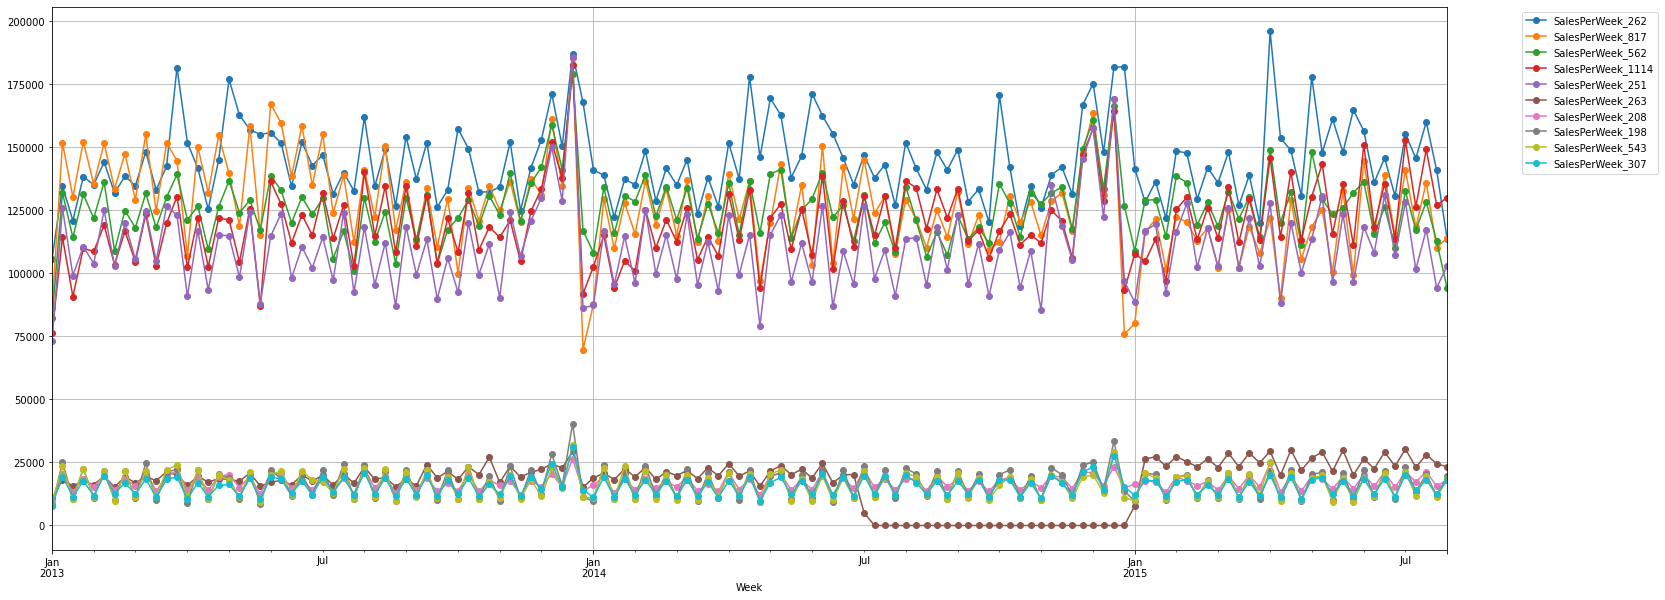

In [ ]:
df = merged_df.copy()
df["Date"] = pd.to_datetime(df.Date).astype("datetime64")
result_df = pd.DataFrame(columns=["Week"])
for i in [262, 817, 562, 1114, 251, 263, 208, 198, 543, 307]:
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker='o', figsize=(25,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

Percentage Change in Sales Per Week 

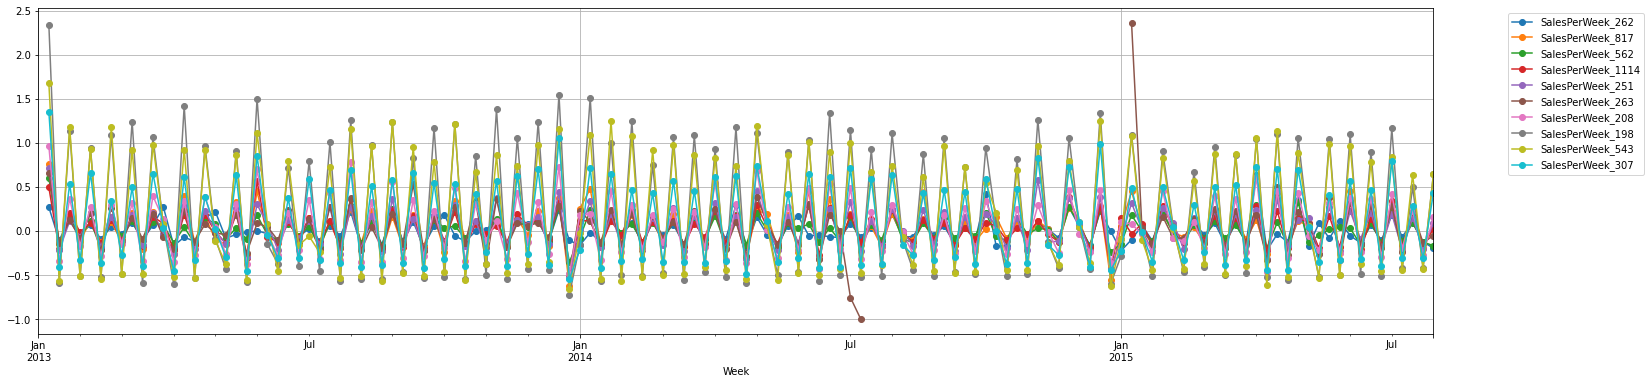

In [ ]:
df = merged_df.copy()
df["Date"] = pd.to_datetime(df.Date).astype("datetime64")
result_df = pd.DataFrame(columns=["Week"])
for i in [262, 817, 562, 1114, 251, 263, 208, 198, 543, 307]:
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  df1["SalesPerWeek_{}".format(i)] = df1["SalesPerWeek_{}".format(i)].pct_change()
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker = 'o', figsize=(25,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

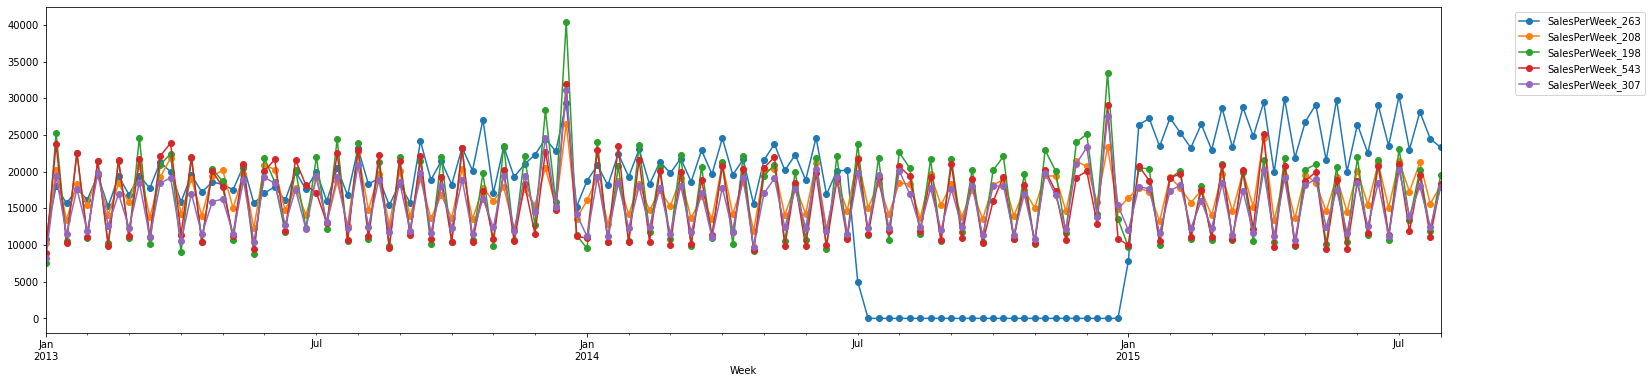

In [ ]:
df = merged_df.copy()
df["Date"] = pd.to_datetime(df.Date).astype("datetime64")
result_df = pd.DataFrame(columns=["Week"])
for i in [263, 208, 198, 543, 307]:
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker = "o", figsize=(25,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## **Section 4: Closest Competitor: Distance and Age (Q4a & Q4b)**

Distance of the closest competitor. Do the stores farther to competitors have a better sale per week than the closer ones? 

We can see that for some stores distance seems to be helping but it is not enough to conclude or generalise for all the stores as we see no difference at all in sales for some stores having farther competitiors.

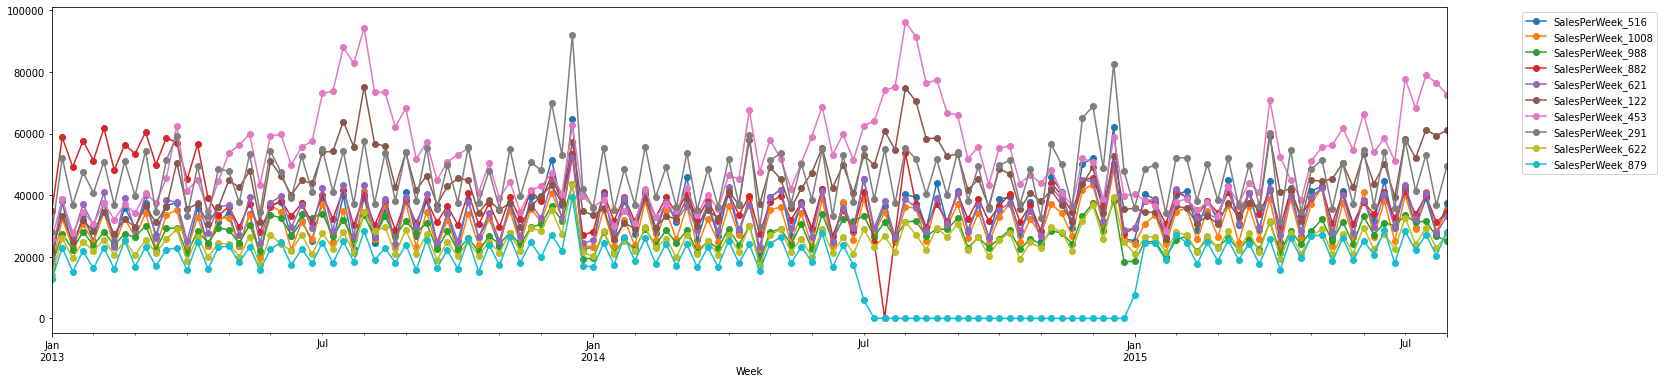

In [ ]:
df = merged_df.copy()
df["Date"] = pd.to_datetime(df.Date).astype("datetime64")
stores = df.sort_values(by="CompetitionDistance")["Store"].unique()

result_df = pd.DataFrame(columns=["Week"])
for i in list(stores[:5])+list(stores[-5:]):
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker = "o", figsize=(25,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

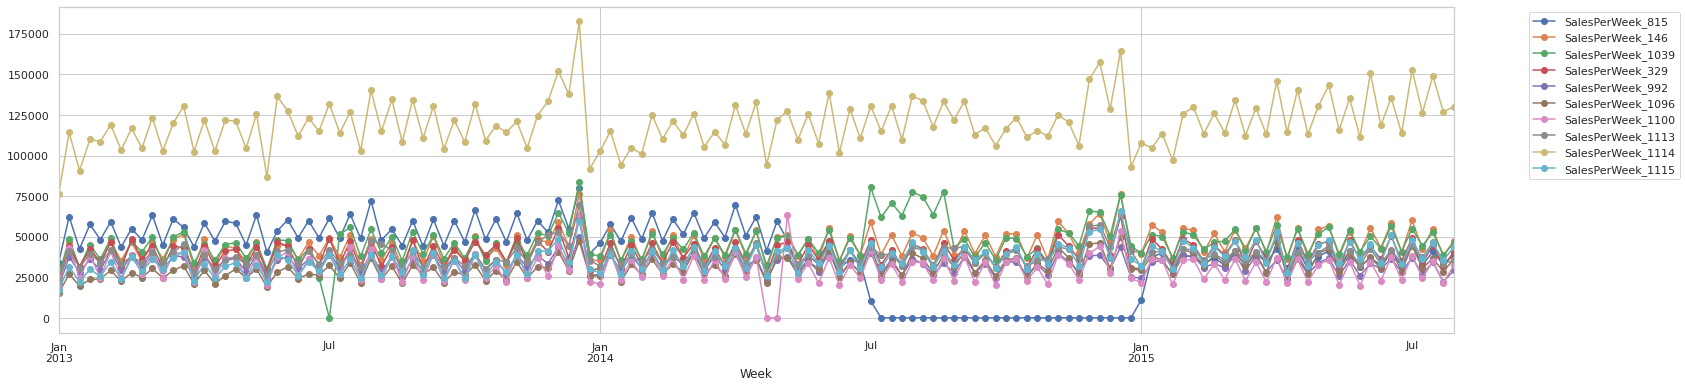

In [ ]:
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year
df['CompetitionOpen'] = 0
df['CompetitionOpen'] = df['CompetitionOpen'].where(df['CompetitionOpenSinceYear'] == 0, other=12 * (df['Year'] - df['CompetitionOpenSinceYear']) + (df['Month'] - df['CompetitionOpenSinceMonth']))
stores = df.sort_values(by="CompetitionOpen", ascending=False)["Store"].unique()

result_df = pd.DataFrame(columns=["Week"])
for i in list(stores[:5])+list(stores[-5:]):
  df1= df.loc[df.Store==i].resample('W', on='Date')['Sales'].sum().reset_index().rename(columns={"Date":"Week","Sales":"SalesPerWeek_{}".format(i)})
  result_df = result_df.merge(df1, on="Week", how="outer")
result_df.plot(x="Week", marker = "o", figsize=(25,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## **Section 5: Pearson Correlation of Features (Q5)**

The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

Here we can see that for ceratin feature pairs like (Open, Customers), (Promo, Sales), (Promo, Customers) we see comparatively significant differences in both correlation scores. Greater Spearman correlation scores tells that they are monotonically increasing in nature.  

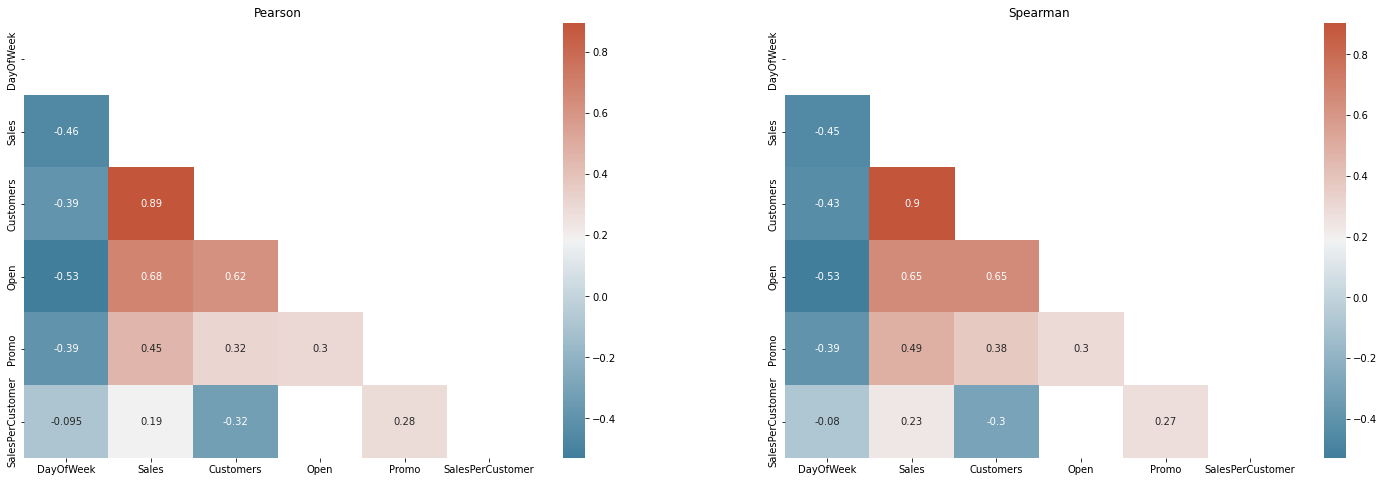

In [ ]:
merged_df["SalesPerCustomer"] = merged_df["Sales"]/merged_df["Customers"]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
df = merged_df[['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SalesPerCustomer']]
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask = mask, cmap=cmap, annot=True, ax=ax1)
ax1.set_title("Pearson")

sns.heatmap(df.corr(method = "spearman"), mask=mask,cmap=cmap, annot=True, ax=ax2)
ax2.set_title("Spearman")

plt.show()

## **Section 6: Permutation Testing (Q6)**

The p-value, which approximates the probability that the score would be obtained by chance. This is calculated as:

(C + 1) / (n_permutations + 1)

Where C is the number of permutations whose score >= the true score.

The best possible p-value is 1/(n_permutations + 1), the worst is 1.0.

Here we take three features Customers(Good), CompetitionDistance(Bad) and Promo(Random).  We can see that for Customers and Promo, p values are small. Where as for CompetitionDistance p value is 1.0 which is as bad as random variable. 

In [ ]:
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X1 = merged_df[['Customers']]
X2 = merged_df[['CompetitionDistance']].fillna(0)
X3 = merged_df[['Promo']]
y = merged_df['Sales'].map(lambda x : np.log(x) if x != 0 else np.log(x+1))

clf = LinearRegression()

for X in [X1, X2, X3]:
    rng = np.random.RandomState(seed=0)
    X_rand = rng.normal(size=X.shape)

    score, perm_scores, pvalue = permutation_test_score(
        clf, X, y, scoring="neg_root_mean_squared_error", n_permutations=200
    )
    print(X.columns.values[0], score, pvalue)


Customers -2.422137351827629 0.004975124378109453
CompetitionDistance -3.312053753117661 1.0
Promo -3.118335166958255 0.004975124378109453


## **Section 7: Interesting findings (Q7)**

**Finding 1**

Type b stores, which had the highest overall sales, had the lowest sales per customer. It can be inferred that type b stores are stores in which many customers buy small amounts of goods. On the other hand, type d stores had the highest sales per customer.

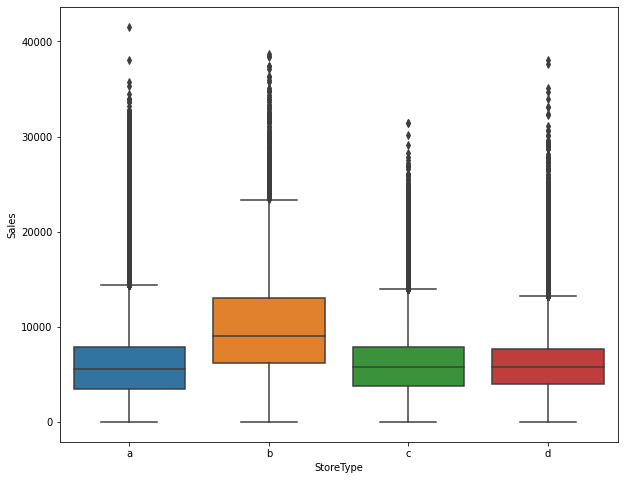

In [170]:
plt.figure(figsize=(10,8))
sns.boxplot(x='StoreType', y='Sales', data=merged_df, order=['a','b','c','d'])
#sns.swarmplot(x='StoreType', y='Sales', data=merged_df, order=['a','b','c','d'])

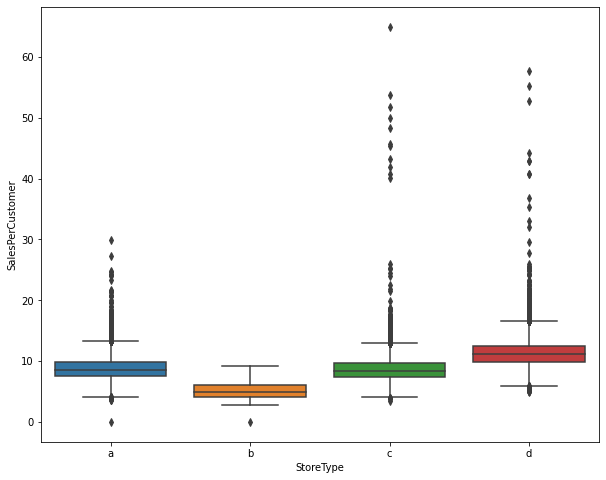

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='StoreType', y='SalesPerCustomer', data=merged_df, order=['a','b','c','d'])

**Finding 2**

**Promo 1 vs Promo 2**
Promo seems to be more successful compared to promo2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


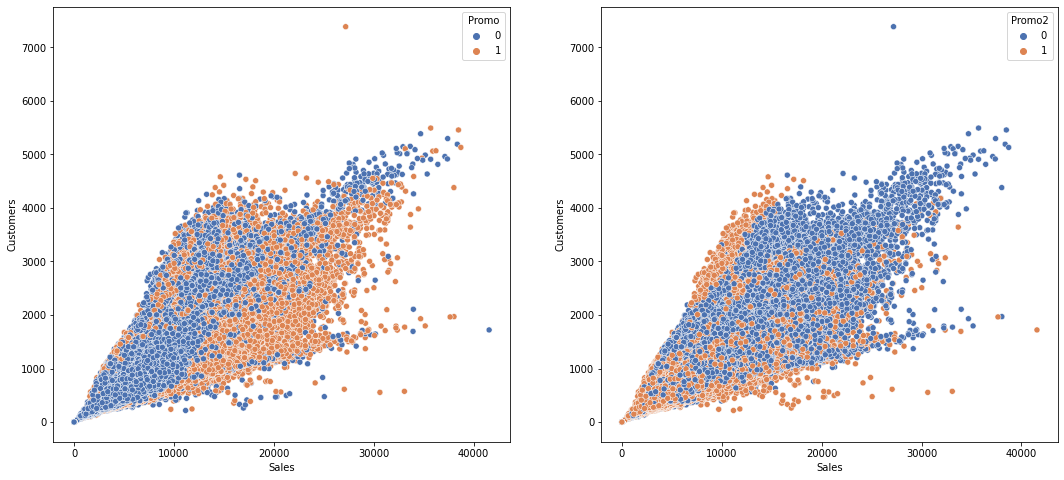

In [168]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

sns.scatterplot(merged_df.Sales, merged_df.Customers, hue=merged_df.Promo, ax=ax1, palette="deep")
sns.scatterplot(merged_df.Sales, merged_df.Customers, hue=merged_df.Promo2, ax=ax2, palette="deep")
plt.show()

**Finding 3**


Majority of stores have very close competitiors.

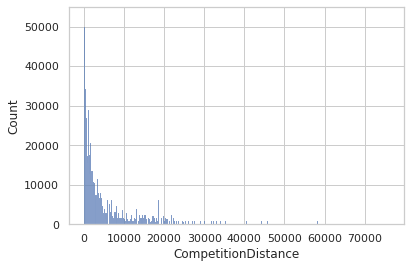

In [183]:
df = merged_df.loc[merged_df['Open']==1]
sns.set(style="whitegrid")
sns.histplot(data=df,x="CompetitionDistance")

**Finding 4**

In November and December, we see a pattern of an increase in sales. In particular, if there is a promotion, the increase in sales seems to be greater.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


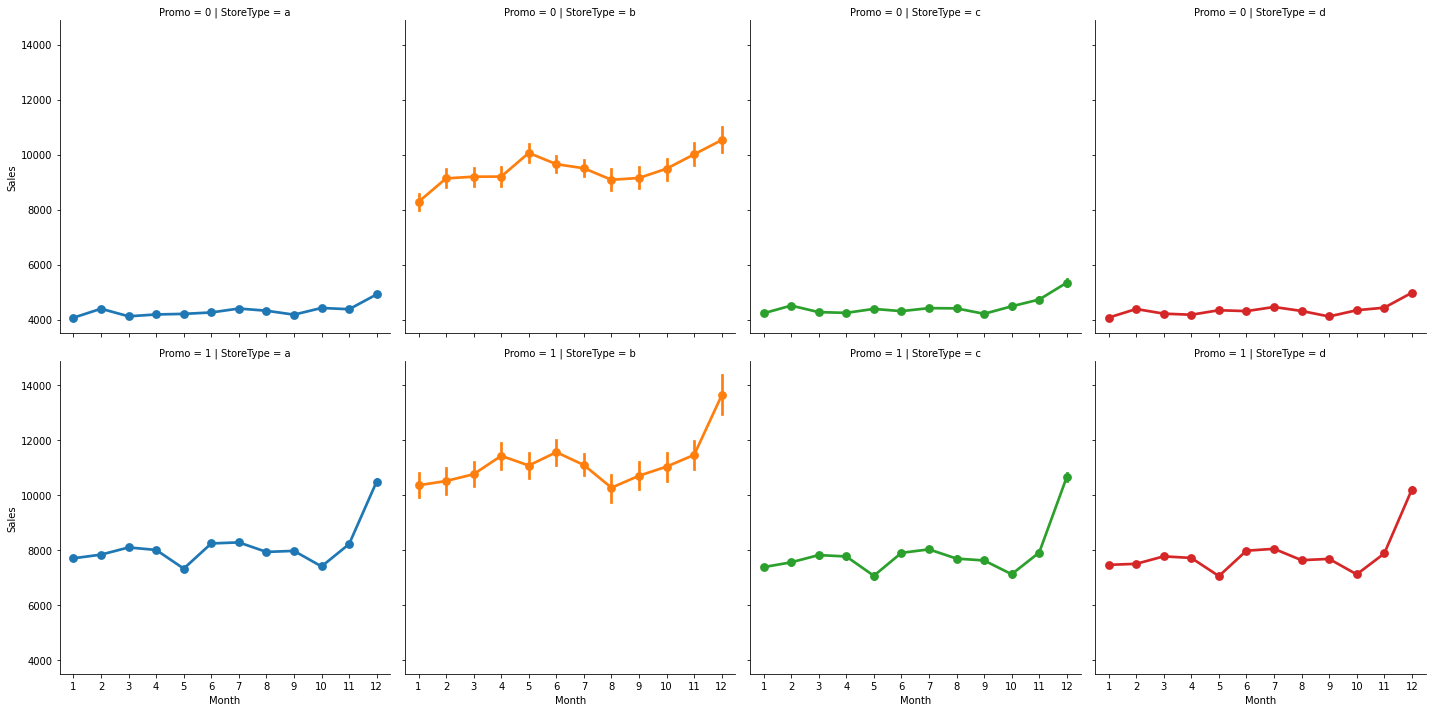

In [172]:
df = merged_df.copy()
df.Date = pd.to_datetime(df.Date)
df.index = df.Date.dt.date
df["Month"] = df.Date.dt.month
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'StoreType',
               hue = 'StoreType',
               row = 'Promo',
               col_order=['a', 'b', 'c', 'd']
               ) 

**Finding 5**

Sales via date of week on both promo/non-promo days. 
It can be seen that the distribution of sales is slightly higher when there is promotion.
It can be seen that there is no promotion on Saturday and Sunday.


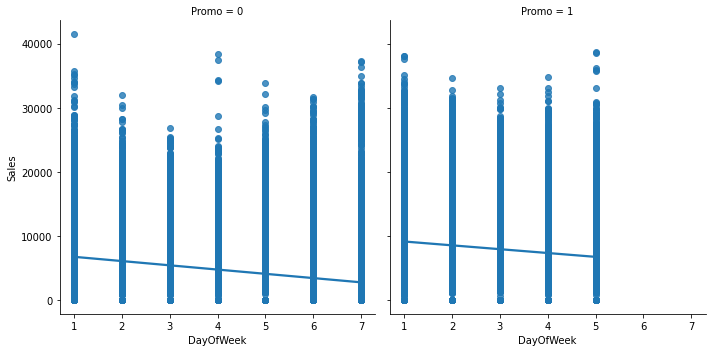

In [179]:
sns.lmplot(data = merged_df, x='DayOfWeek', y='Sales', col='Promo')

## **Section 8: Train Test Split and Modelling (Q8)**

Preprocessing Steps

In [139]:
merged = train_df.merge(store_df,how='left',on='Store')
#merged = test_df.merge(store_df,how='left',on='Store')

In [140]:
merged.CompetitionDistance.fillna(merged.CompetitionDistance.median(),inplace=True)
merged.CompetitionOpenSinceMonth.fillna(0, inplace=True)
merged.CompetitionOpenSinceYear.fillna(0, inplace=True)
merged.Promo2SinceWeek.fillna(0, inplace=True)
merged.Promo2SinceYear.fillna(0, inplace=True)
merged.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
dtype: int64

In [141]:
merged['Year'] = pd.to_datetime(merged.Date).dt.year
merged['Month'] = pd.to_datetime(merged.Date).dt.month
merged['Day'] = pd.to_datetime(merged.Date).dt.day

In [142]:
df = pd.get_dummies(merged['StoreType'], drop_first=True)
merged = pd.concat([merged,df],axis=1)
merged.drop(columns=['PromoInterval','StoreType'], inplace = True)

In [143]:
def convertToLogScale(x):
  return np.log(x) if x != 0 else 0

#train['Log Sales'] = train['Sales'].apply(convertToLogScale)
merged['Log CompetitionDistance'] = merged['CompetitionDistance'].apply(convertToLogScale)
#merged['Log Customers'] = merged['Customers'].apply(convertToLogScale)


In [144]:
map = {'a':1, 'b':2, 'c':3}
merged = merged.replace({'Assortment':map})

In [145]:
merged.drop(columns=['Store','Customers','CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear'], inplace = True)
#merged.drop(columns=['Store','CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear'], inplace = True)
merged.isna().sum()

DayOfWeek                  0
Date                       0
Sales                      0
Open                       0
Promo                      0
StateHoliday               0
SchoolHoliday              0
Assortment                 0
Promo2                     0
Year                       0
Month                      0
Day                        0
b                          0
c                          0
d                          0
Log CompetitionDistance    0
dtype: int64

In [146]:
merged["StateHoliday"]=np.where(merged["StateHoliday"] == '0' ,0,1)

In [147]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   DayOfWeek                1017209 non-null  int16   
 1   Date                     1017209 non-null  category
 2   Sales                    1017209 non-null  float64 
 3   Open                     1017209 non-null  int16   
 4   Promo                    1017209 non-null  int16   
 5   StateHoliday             1017209 non-null  int64   
 6   SchoolHoliday            1017209 non-null  int16   
 7   Assortment               1017209 non-null  int64   
 8   Promo2                   1017209 non-null  int32   
 9   Year                     1017209 non-null  int64   
 10  Month                    1017209 non-null  int64   
 11  Day                      1017209 non-null  int64   
 12  b                        1017209 non-null  uint8   
 13  c                        10

**Train/Test Split**

In [148]:
merged.index = pd.to_datetime(merged.Date).dt.date
test = merged.loc[datetime.date(2015,7,31):datetime.date(2015,5,1)].reset_index(drop=True)
train = merged.loc[datetime.date(2015,4,30):].reset_index(drop=True)

In [149]:
train.drop(columns=["Date"], inplace = True)
test.drop(columns=["Date"], inplace = True)

test = test[test["Sales"] > 0]

In [150]:
X_train, y_train = train.drop(columns=["Sales"]), train['Sales']
X_test, y_test = test.drop(columns=["Sales"]), test["Sales"]

**RMSPE**

In [109]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = y.get_label()
    return "rmspe", rmspe(y,yhat)

**Random Forest Model**

In [160]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15, max_depth=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.3864


In [159]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 30, max_depth=30)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.2123


In [154]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.2107


**XGBoost Model**

In [ ]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

In [123]:
y_pred = model.predict(xgb.DMatrix(X_test))
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.3254


In [ ]:
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.02,   # learning rate
          "max_depth": 12,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

In [153]:
y_pred_xgb = model.predict(xgb.DMatrix(X_test))
error = rmspe(y_test, y_pred_xgb)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.2997


In [ ]:
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.04,   # learning rate
          "max_depth": 13,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 3000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

In [171]:
y_pred_xgb2 = model.predict(xgb.DMatrix(X_test))
error = rmspe(y_test, y_pred_xgb2)
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.2927


Random Forest

Here we can see that max_depth of the tree parameter tuning can greatly increase the performance of the model. 

XGBoost

For XGBoost, learning rate, max_depth and boost_round are the three hyperparameters were tuned and with increasing depth of the tree, it started taking slower steps increasing the overall runtime and converging really late.   

## **Section 9: t-test (Q9)**

The t-value measures the size of the difference relative to the variation in your sample data. The greater the magnitude of T, the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. The closer T is to 0, the more likely there isn't a significant difference.
T score we got is not too big but not too small either. There are certainly differences in predictions mainly due to their varying performances.

In [156]:
import scipy
#Comparing predictions from random forest vs xgb
scipy.stats.ttest_ind(y_pred, y_pred_xgb, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=16.31250201123867, pvalue=8.937293482376964e-60)

## **Section 10: Screenshots (Q10)** 

In [137]:
final_df = pd.DataFrame({"Id":test_df["Id"], "Sales":y_pred})

In [138]:
final_df.to_csv("submission_2.csv", index = False)

Public Score & Highest Rank: 0.19414 & 2754

Private Score & Highest Rank: 0.21864 & 2734

Kaggle profile link: https://www.kaggle.com/manal31

Screenshot(s):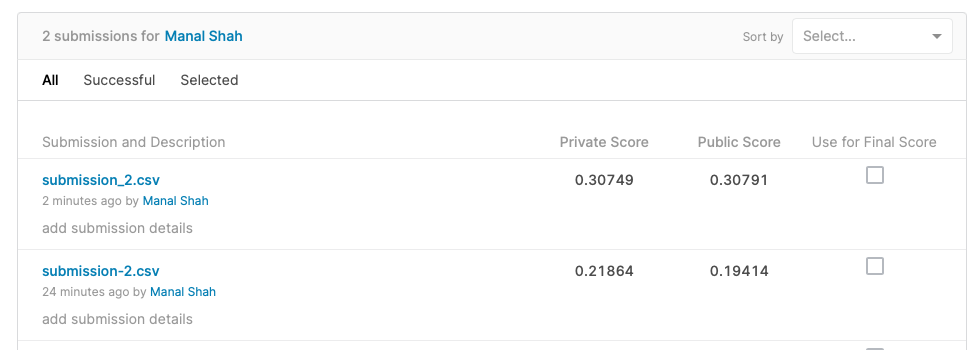